Title: Tiles Suffling

About the technique:
As the name suggest, we will divide the given image into 9 tiles and shuffle them randomly. This technique is used to address two issues:
1. Problem of Binary Clasification: The issue is that in binary class classification, if the model did not find the features of class A, then it will directly categorize the image as class B irrespective of the contends in the image. For example, if I have a model of cat vs dog and as a testing image I have given an image of bottle. Now, first it may check for features of cat and if it did not find any, then it will directly categorize the image of a bottle as dog. So, the only way to address this issue is to convert the problem into a categorical with 3 classes. Class A and Class B and Class C (which are nothing but images with tiles shuffled).
2. Problem of CNN models: In CNN model, they will not maintain the notion of entity in an image. They just look for features in the image. For example, if we train a model to detect human faces, if we jumble the features like eyes, nose, ears in wrong places and if we show this image to CNN model, as it is detecting those features it will consider that image as humans irrespective on the relative position between the features. So, using tiles shuffling, we can address this issue to some extend.

Importing required libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import pathlib as pl

In [2]:
#This is just like a dictionary. Based on the index of the tile (1-9) we will get the coordinates of the tile
def tile_range_finder(indx, ranges):
    op = 0
    for i in range(3):
        for j in range(3):
            if op == indx:
                return ((ranges[i], ranges[i+1]), (ranges[j], ranges[j+1]))
            else:
                op += 1

In [3]:
#Using this function, we will override the image and replace it with other regions
def range_writer(img, range_, img_2):
    for i in range(range_[0][0], range_[0][1]):
        for j in range(range_[1][0], range_[1][1]):
            img[i][j] = img_2[i - range_[0][0]][j - range_[1][0]]
    return img

In [4]:
#This is the parent function, in this function we will pass the image and the indices of the tiles which we want to shuffle
def tile_swapper(img, tile1_idx, tile2_idx):
    req = img.shape[0] // 3
    ranges = list(range(0, img.shape[0] + 1, req))
    range1 = tile_range_finder(tile1_idx, ranges)
    range2 = tile_range_finder(tile2_idx, ranges)
    temp = copy.deepcopy(img[range1[0][0]:range1[0][1],range1[1][0]:range1[1][1]])
    temp2 = img[range2[0][0]:range2[0][1],range2[1][0]:range2[1][1]]
    img = range_writer(img, range1, temp2)
    img = range_writer(img, range2, temp)
    return edge_smoother(img)

In [5]:
# As CNN is sensitive to edge, whatever the new edges generated due to shuffle are made smoother
def edge_smoother(img):
    blurred_img = cv.GaussianBlur(img, (21, 21), 0)
    mask = np.zeros((img.shape[0], img.shape[0], 3))
    req = img.shape[0] // 3
    ranges = range(0, img.shape[0], req)
    for i in range(ranges[1]-10, ranges[1]+10):
        for j in range(0, img.shape[0]):
            for k in range(3):
                mask[i][j][k] = 255
    for i in range(ranges[2]-10, ranges[2]+10):
        for j in range(0, img.shape[1]):
            for k in range(3):
                mask[i][j][k] = 255
    for i in range(ranges[1]-10, ranges[1]+10):
        for j in range(0, img.shape[0]):
            for k in range(3):
                mask[j][i][k] = 255
    for i in range(ranges[2]-10, ranges[2]+10):
        for j in range(0, img.shape[1]):
            for k in range(3):
                mask[j][i][k] = 255

    out = np.where(mask==np.array([255, 255, 255]), blurred_img, img)
    return out

In [6]:
img = cv.imread(r"D:\Samsung Prism\Datasets\Cat and Dog\Training\Cat\cat.102.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (300, 300))

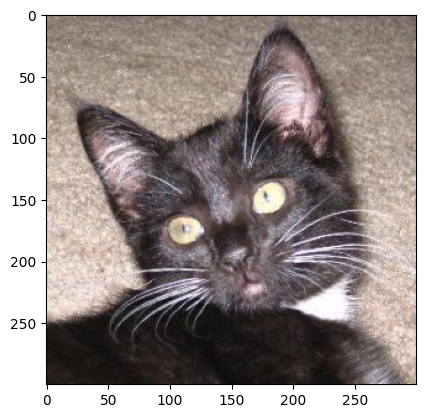

In [7]:
plt.imshow(img)

<Figure size 640x480 with 0 Axes>

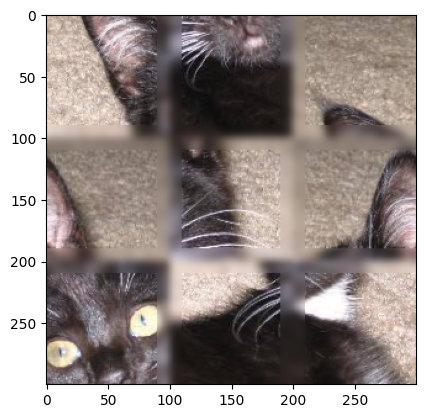

<Figure size 640x480 with 0 Axes>

In [8]:
# Shuffling the image, here we can iterate as many times as we want. In each iteration, we will select two tiles randomly and 
#shuffle them
new_img = copy.deepcopy(img)
for i in range(6):
    a = random.randint(0, 8)
    b = random.randint(0, 8)
    tile_swapper(new_img, a, b)
plt.imshow(edge_smoother(new_img))
plt.figure()

In [11]:
#For batch execution, pass the path of input file and output file

input_file_path = r""
output_file_path = r""

pathlib_file = pl.Path(input_file_path)
all_img_path = list(pathlib_file.glob("*"))

counter = 0
for i in all_img_path:
    img = cv.imread(str(i))
    img = cv.resize(img, (300, 300))
    new_img = copy.deepcopy(img)
    for i in range(6):
        a = random.randint(0, 8)
        b = random.randint(0, 8)
        tile_swapper(new_img, a, b)
    new_img = edge_smoother(new_img)
    cv.imwrite(output_file_path + "\\" + "aug_ts_" + str(counter) + ".jpg", new_img)
    counter += 1